# Evaluating the effectiveness and applications of dimensionality reduction techniques in breast cancer diagnosis

Ho Thi Hoang Nhu

# Table of contents
1. [Introduction](#Introduction)
2. [My Objective in Project](#My-Objective-in-Project)
3. [Dataset Selection](#Dataset-Selection)
4. [Importing Packages](#Importing-Packages)
5. [Loading Dataset](#Loading-Dataset)
    - [Checking missing values](#Checking-missing-values)
    - [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
        - [*Check distribution*](#Check-distribution)
        - [*Correlations*](#Correlations)
        - [*The Relationships*](#The-Relationships)
        - [*Hypothesis 1*](#Hypothesis-1)
6. [Methodology](#Methodology)
    - [PCA](#PCA)
        - [*Accuracy scores*](#Accuracy-scores)
        - [*Hypothesis 2*](#Hypothesis-2)
    - [t-SNE](#t-SNE)
    - [MDS](#MDS)
7. [Evaluation Criteria](#Evaluation-Criteria)
    - [Accuracy scores](#Accuracy-scores)
8. [Discussions](#Discussions)
    - [Conclusion](#Conclusion)
    - [Limitations](#Limitations)
    - [Recommendations](#Recommendations)
9. [Further Considerations and Future Directions](#Further-Considerations-and-Future-Directions)


# Introduction

Breast cancer presents a persistent and significant global health challenge, and its profound impact highlights the urgent need for continuous research across diagnosis, treatment, and fundamental understanding of the disease (Harbeck & Gnant, 2017). Early diagnosis plays a pivotal role in improving treatment outcomes. Medical imaging and analysis of cellular features are indispensable tools for detecting and classifying breast tumors as malignant or benign. However, the high dimensionality of medical data presents challenges in the analysis process.

To address these complexities, we apply dimensionality reduction techniques to analyze the **Diagnostic Wisconsin Breast Cancer Database**.  By reducing the number of features while preserving essential information, we aim to optimize diagnostic models and uncover insights into the distinguishing factors of different cancer types.  This database offers a well-established resource for research, consisting of features extracted from digitized images of breast masses (Bennett, 1992; Bennett & Mangasarian, 1992).

**Dimensionality reduction** techniques streamline datasets by projecting them into a lower-dimensional space. This is paramount when working with high-dimensional data, mitigating concerns like computational costs, the risk of overfitting, and model complexity. **Principal component analysis (PCA)** is a widely recognized dimensionality reduction method.  It uncovers orthogonal directions of maximum variance (principal components) within the data, generating new uncorrelated features. By focusing on the principal components accounting for substantial variance, we can remarkably reduce dimensionality while conserving the underlying structure of the dataset (Jolliffe & Cadima, 2016).

Besides PCA, other robust methods contribute to the field. **Multidimensional scaling (MDS)** is designed to preserve the distances between data points in the original high-dimensional space when projected into a lower-dimensional space. This makes it particularly useful for visualization and for understanding the relationships between different breast cancer samples based on their features.  For visualization purposes in high-dimensional datasets, **t-Distributed Stochastic Neighbor Embedding (t-SNE)** proves exceptionally useful; it projects data into a lower-dimensional space, emphasizing local data point relationships (van der Maaten & Hinton, 2008).

# My Objective in Project

In this project, our primary focus is on determining the most effective dimensionality reduction method for enhancing the accuracy of breast cancer diagnostic models. Specifically, we concentrate on comparing various techniques, including PCA, SVD, and t-SNE, by evaluating their impact on accuracy scores obtained from logistic regression models after dimensionality reduction. 

Our goal is to pinpoint the method that achieves the highest accuracy in classifying breast cancer data, thereby providing valuable insights for improving diagnostic accuracy and guiding future research in this domain.

# Dataset Selection

The Diagnostic Wisconsin Breast Cancer Database comprises measurements of 32 cellular characteristics across 569 samples. These samples are categorized as either benign (B) or malignant (M), representing non-cancerous and cancerous breast masses, respectively. 
  
The dataset offers a comprehensive view of cellular attributes relevant to breast cancer diagnosis, including features such as cell shape, size, and texture, as well as nuclei characteristics. With its inclusion of both benign and malignant samples, the dataset serves as a valuable resource for developing and evaluating diagnostic models aimed at distinguishing between different cancer types based on cellular characteristics. 
  
  For more detailed information and access to the dataset, please refer to the following link: [Diagnostic Wisconsin Breast Cancer Database](https://techflare.blog/3-ways-to-do-dimensionality-reduction-techniques-in-scikit-learn/).



## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report,pairwise_distances

## Loading Dataset

In [2]:
df = pd.read_csv('~/Desktop/BreastCancer.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print("Data dimension: ",df.shape)

Data dimension:  (569, 32)


## Checking missing values


In [4]:
#Number of missing values for each column
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Check data structure to understand dataset more clearly.
df.iloc[:, 2:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Exploratory Data Analysis (EDA)

### Check distribution

diagnosis
B    357
M    212
Name: count, dtype: int64


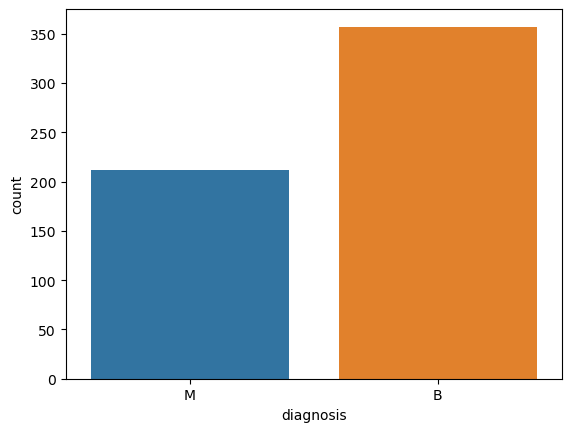

In [6]:
#Check dataset
sns.countplot(x='diagnosis', data=df)
freq = df['diagnosis'].value_counts()
print(freq)

<Axes: xlabel='concavity_mean', ylabel='Density'>

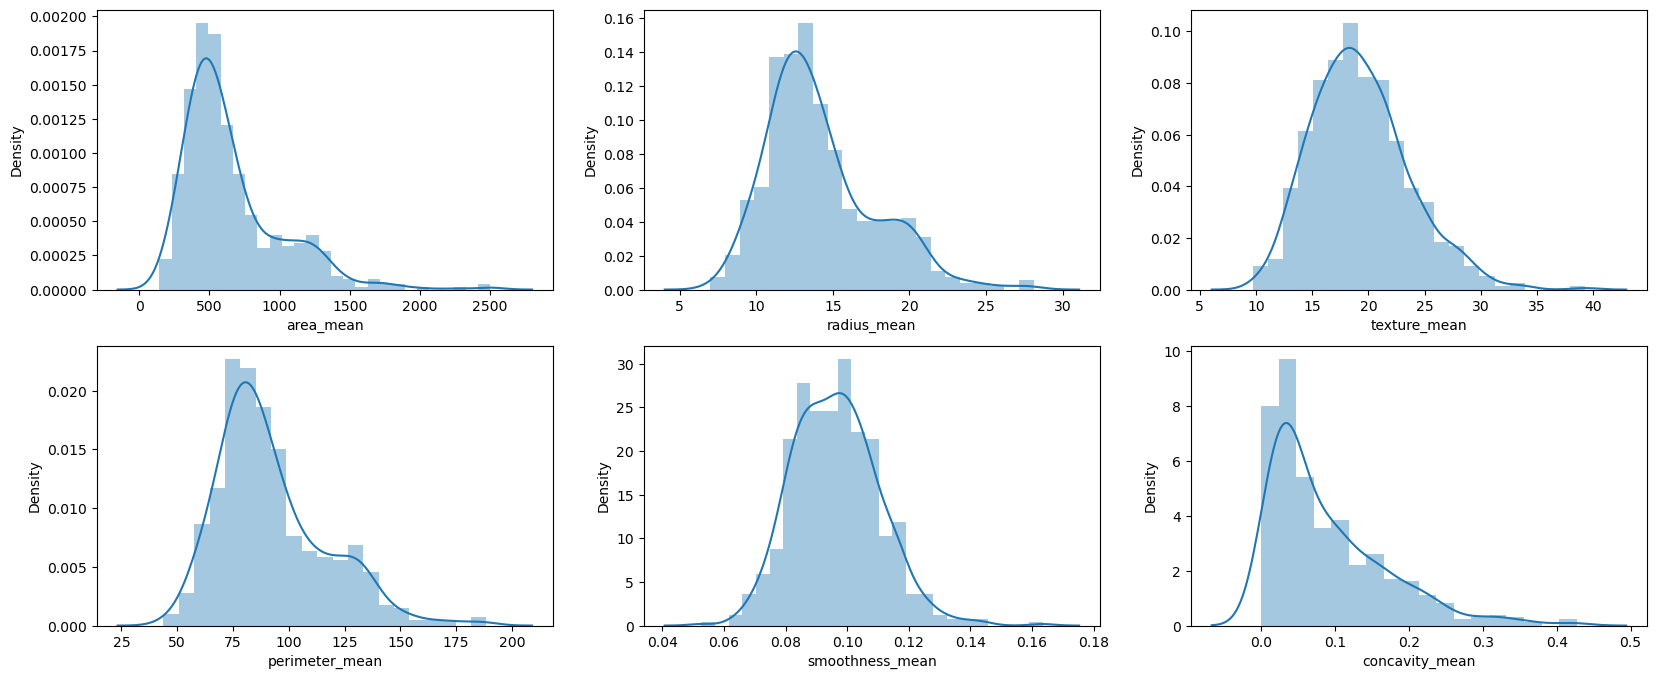

In [7]:
#Checking Distribution of Data in Features
fig, axes = plt.subplots(2,3,figsize=(20,8))
sns.distplot(df['area_mean'],ax = axes[0,0])
sns.distplot(df['radius_mean'],ax = axes[0,1])
sns.distplot(df['texture_mean'],ax = axes[0,2])
sns.distplot(df['perimeter_mean'],ax = axes[1,0])
sns.distplot(df['smoothness_mean'],ax = axes[1,1])
sns.distplot(df['concavity_mean'],ax = axes[1,2])

### Correlations

In [8]:
# Correlations
#First will check the correlation between variables.
print("Dimension dataset:", df.shape)

# Calculate Pearson correlation matrix
df_cor=df.iloc[:, 2:].corr()
df_cor

Dimension dataset: (569, 32)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


**Correlation Matrix**: One of the assumptions in most machine learning models is that no variable in the model has a high correlation with any other variable. High correlation between variables causes multicollinearity issues, so it is important to understand the relationship between each variable to better interpret the model's results.

**Pearson Correlation Coefficient**: One way to quantify the relationship between two variables is the Pearson correlation coefficient, a measure of linear relationship ranging from -1 to 1.

- -1 represents a perfectly negative linear correlation between two variables.
- 0 represents no linear correlation between two variables.
- 1 indicates a perfectly positive linear correlation between two variables.


The correlation matrix depicts the relationship between two variables in matrix form. A color-coded matrix like this makes it much easier to read. For this data, we will use the implementation of the correlation matrix in sklearn using the Pearson correlation coefficient as the default.

**Diagonal Correlation Matrix**: Since the correlation matrix is symmetric, half of the coefficients are redundant. Therefore, the diagonal correlation matrix can be used to quickly and easily visualize the correlation.

<Axes: >

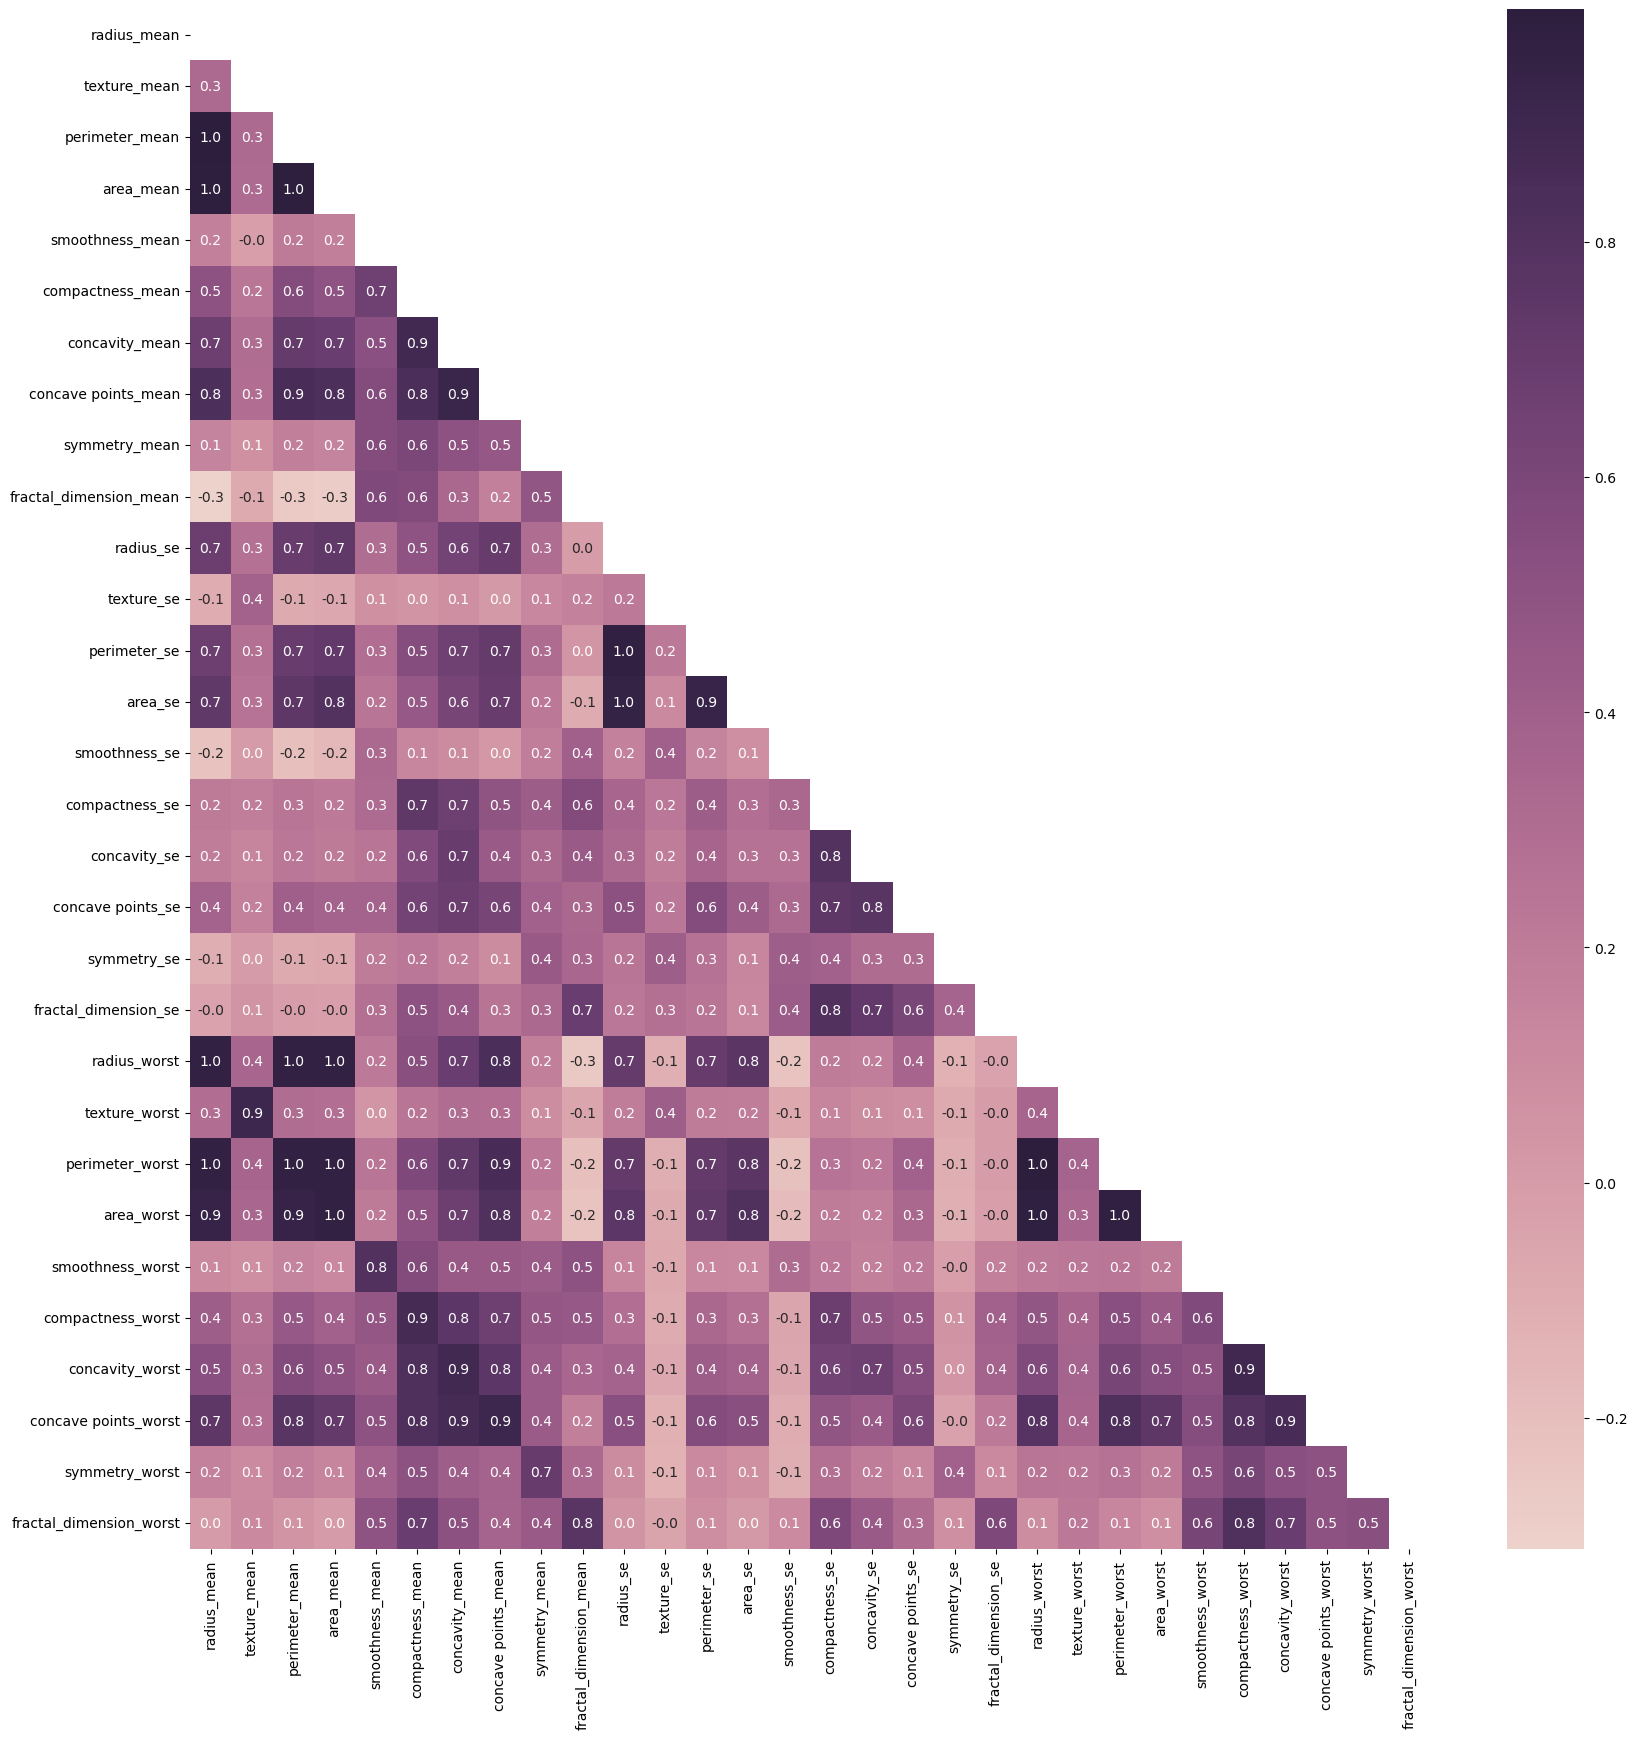

In [9]:
#heatmap
plt.subplots(figsize=(20,20))
mask = np.triu(np.ones_like(df_cor, dtype=bool))
sns.heatmap(df_cor, annot= True,cmap=sns.cubehelix_palette(200), fmt='.1f', mask=mask)

From the heat map, we can see that many variables in the dataset are highly correlated. What are variables having correlation greater than 0.8?

<Axes: >

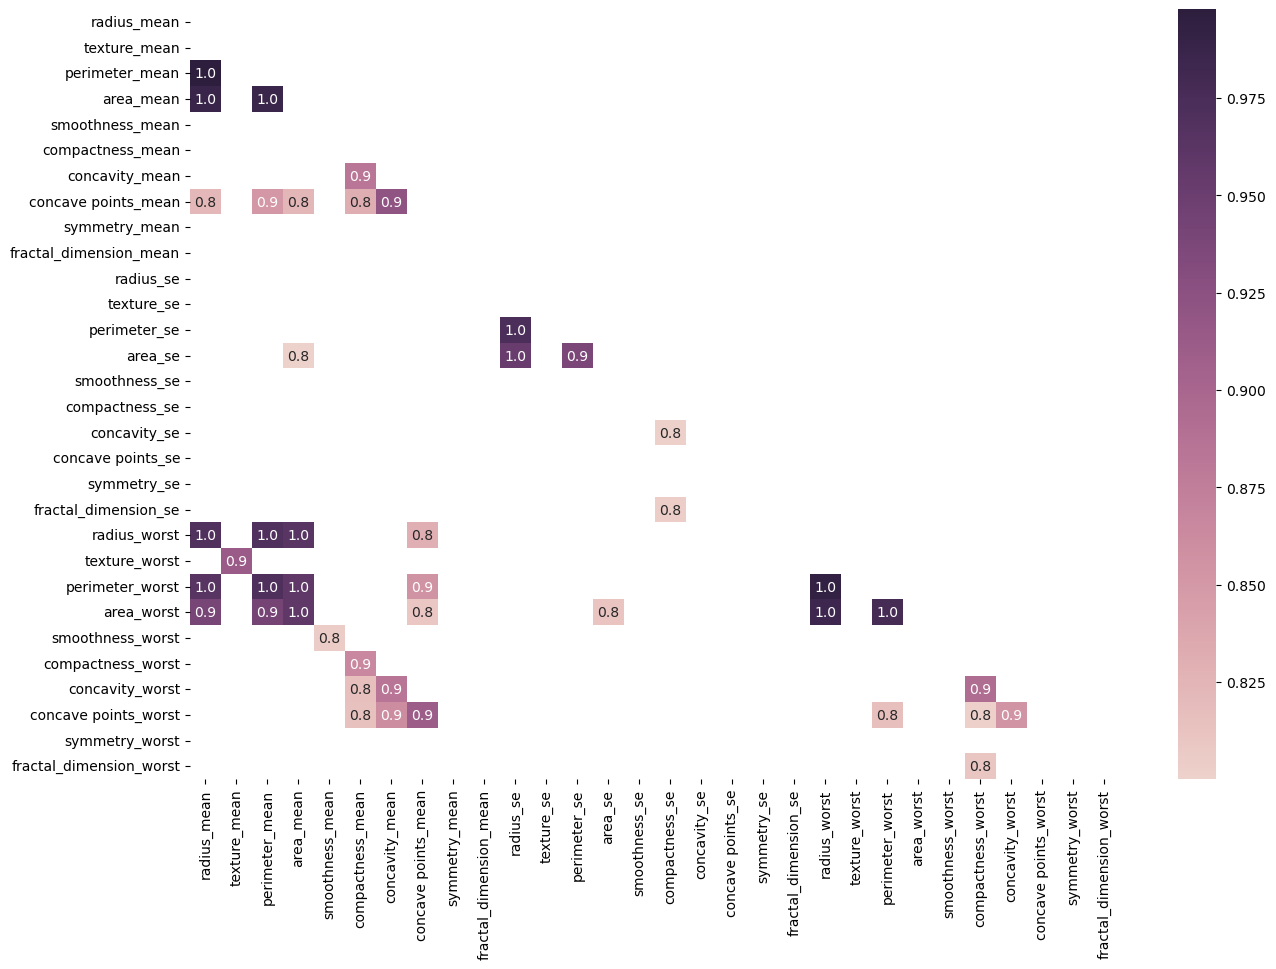

In [10]:
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(df_cor[df_cor > 0.8], dtype=bool))
sns.heatmap(df_cor[df_cor > 0.8], annot=True, fmt='.1f', cmap=sns.cubehelix_palette(200),mask=mask)

**Comment:**
- Strong correlations observed among key geometric attributes like radius, perimeter, and area (>0.9), reflecting their inherent mathematical relationships.
- Texture features, notably texture_mean and texture_worst, exhibit a high correlation (0.98), given the definition of texture_worst as the maximum texture value.
- Attributes related to compactness, concavity, and concave points show significant correlations (0.7 to 0.9), indicating interdependence in capturing structural irregularities.
- Symmetry measures, particularly symmetry_mean and symmetry_worst, are correlated (0.7), suggesting consistent assessments across different scales.
- Fractal dimension attributes, like fractal_dimension_mean and fractal_dimension_worst, are correlated (0.77), indicating coherence in fractal dimension assessments.
- Addressing these high correlations is crucial for feature selection to prevent predictive bias in cancer diagnosis models.


### The Relationships

The main reason for using a pair of plots is that humans can understand the relationship between two variables using a single plot like a 2D scatter plot or a KDE plot. While 3D graphs can be used to visualize the relationship between three given variables, real-world data, such as in our case, often involve more than three variables. Therefore, a good approach is to explore the relationship between a pair of specific features. Seaborn's pairplot feature is very useful in such cases and is widely used.

Creating a pair plot with 30 features takes a lot of time. So, we will only use the "average" values of the given features to get an idea of the distribution.

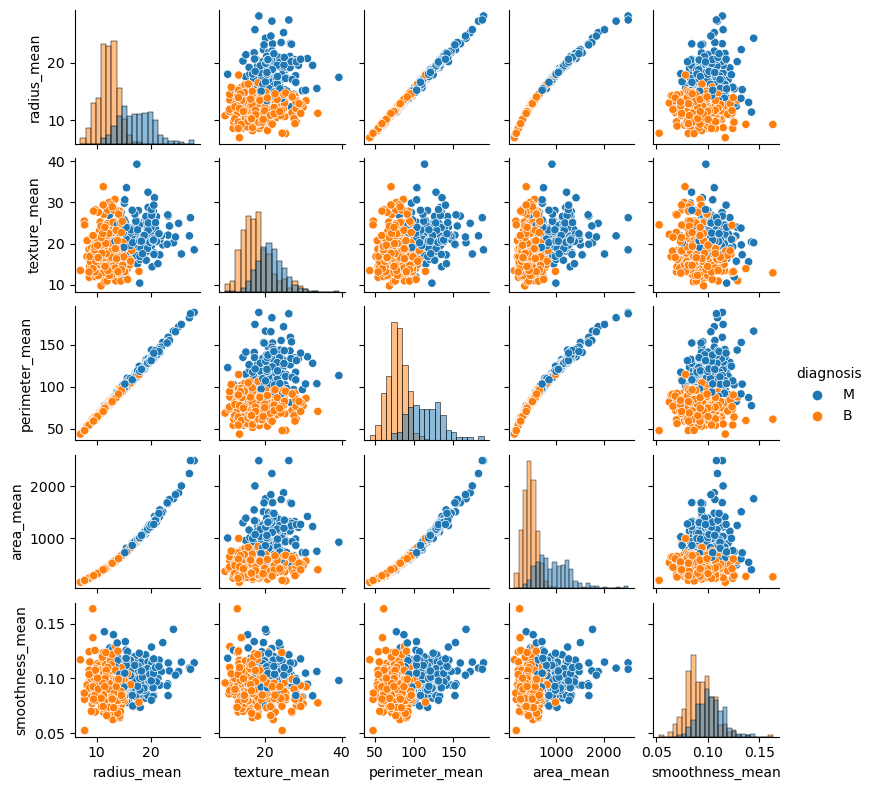

In [11]:
#Selected Joint and marginal Feature distributions
sns.pairplot(df.iloc[:,1:7],hue='diagnosis', diag_kind='hist',height=1.6)

**Comment**: 
- The diagonal plots represent KDE plots for each variable/feature, while the upper and lower triangles are essentially mirrored images of each other.

- One major takeaway from these plots is the discernible separation between malignant and benign data types, which could prove useful in designing machine learning algorithms.

Based on the objectives of my project and the findings from exploratory data analysis (EDA), I propose the following hypothesis:

> ### Hypothesis 1
> PCA can effectively reduce breast cancer data to 2 dimensions while retaining important information for classification and preserving the underlying data structure 

# Methodology

- Application of dimensionality reduction techniques, including Principal Component Analysis (PCA), Multidimensional scaling (MDS), and t-Distributed Stochastic Neighbor Embedding (t-SNE), to reduce the number of features while retaining essential information.
- Training logistic regression models on datasets processed through different dimensionality reduction methods.
- Evaluation of the accuracy scores obtained from logistic regression models as a benchmark for comparing the effectiveness of each dimensionality reduction technique.

## PCA

Principal component analysis (PCA) is a very useful tool in machine learning, especially when we have big datasets. It helps us simplify things while keeping the most important information (Jolliffe & Cadima, 2016).

It can sometimes be tricky to figure out what the principal components mean in terms of our original measurements.  But the most important thing to remember is that they show where the data is most spread out. In math terms, the principal components are special directions (eigenvectors) that come from analyzing how the data is connected (the covariance matrix). The amount of spread in each direction is shown by something called an eigenvalue (Jolliffe & Cadima, 2016).

The main reason to use PCA is to make datasets smaller. This is helpful because it's easier to see what's going on in the data, and it makes calculations faster for computers (Abdi & Williams, 2010).

- **Using PCA to Understand Breast Cancer**

Let's use PCA to explore the breast cancer dataset. We'll take the data, which has 30 different measurements, and visualize it in both two and three dimensions. This will help us see the data more clearly while still preserving the most important differences between samples. By preparing the data and applying PCA, we can find the directions that show the most variation between different cancer cases.

Ultimately, we'll want to compare the visual insights we gain from the 2D and 3D representations and potentially use accuracy scores to assess which dimensionality provides a better basis for understanding and potentially classifying the data.

![PCA](http://www.nlpca.org/fig_pca_principal_component_analysis.png)

Source : [A Layman’s Introduction to Principal Components](http://www.nlpca.org/pca_principal_component_analysis.html)

In [12]:
#splitting into matrix of features X and target variable Y
y = df.diagnosis
X = df.iloc[:,2:32]

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)

Before applying PCA, it's crucial to standardize the data to ensure that all features have a comparable scale.

- **Feature Scaling:**

Feature scaling, also known as data normalization, is a crucial preprocessing step in machine learning. It involves rescaling the range of independent variables or features of the data to a standard scale. This process ensures that no single feature dominates the analysis due to its scale. We'll perform standard normalization, where all values are rescaled to the same unit.

For more detailed information on feature scaling, refer to  [this article](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/).

- **Implementation in Python:**

We'll utilize **Scikit-learn** to implement PCA. The process involves:
   1. Instantiating a PCA object.
   2. Fitting the PCA object to the standardized data to find the principal components using the fit method.
   3. Applying rotation and dimensionality reduction using the transform method.
   4. Optionally specifying the number of components to retain.

After standardization, the mean of the data will be 0, and the variance will be 1, ensuring consistency across features.

By following these steps, we'll reduce the dimensionality of the dataset while retaining as much relevant information as possible, facilitating visualization and further analysis.

         0         1         2         3         4         5         6   \
0  0.218902  0.103725  0.227537  0.220995  0.142590  0.239285  0.258400   
1 -0.233857 -0.059706 -0.215181 -0.231077  0.186113  0.151892  0.060165   
2 -0.008531  0.064550 -0.009314  0.028700 -0.104292 -0.074092  0.002734   
3  0.041409 -0.603050  0.041983  0.053434  0.159383  0.031795  0.019123   
4  0.037786 -0.049469  0.037375  0.010331 -0.365089  0.011704  0.086375   

         7         8         9   ...        20        21        22        23  \
0  0.260854  0.138167  0.064363  ...  0.227997  0.104469  0.236640  0.224871   
1 -0.034768  0.190349  0.366575  ... -0.219866 -0.045467 -0.199878 -0.219352   
2 -0.025564 -0.040240 -0.022574  ... -0.047507 -0.042298 -0.048547 -0.011902   
3  0.065336  0.067125  0.048587  ...  0.015417 -0.632808  0.013803  0.025895   
4 -0.043861 -0.305941 -0.044424  ... -0.004407 -0.092883  0.007454 -0.027391   

         24        25        26        27        28        29  
0  0

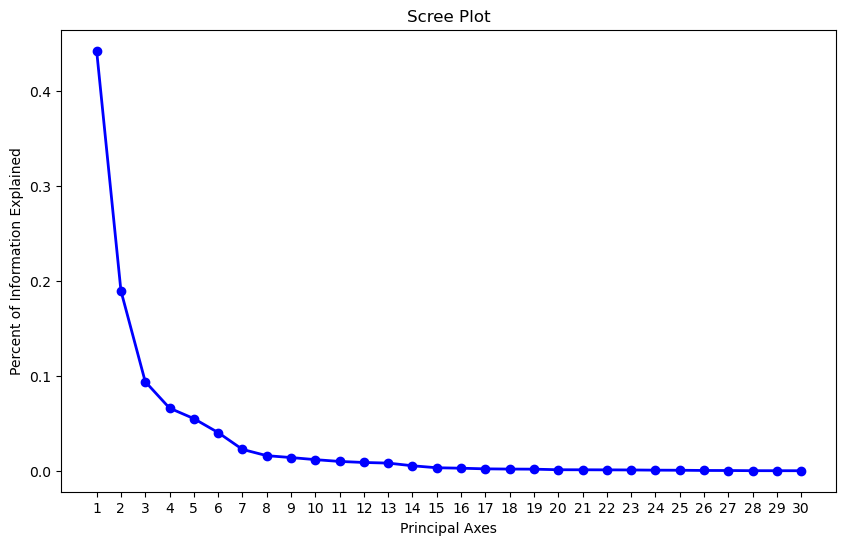

In [13]:
#performing the principal component analysis with all 30 components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_normalized)

components = pd.DataFrame(pca.components_)
print(components.head())
expl_var = pca.explained_variance_ratio_
print(expl_var)

var_ratio = pd.DataFrame(expl_var)
print(var_ratio)

plt.figure(figsize=(10,6))
plt.plot(np.arange(1,len(var_ratio)+1),var_ratio, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(var_ratio)+1))
plt.ylabel('Percent of Information Explained')
plt.show()


We'll use the PCA module from the scikit-learn library to perform PCA. By specifying the number of components as 3, we aim to reduce the dimensionality of our dataset to three principal components. The PCA algorithm will identify the directions (principal components) that capture the maximum variance in the data.

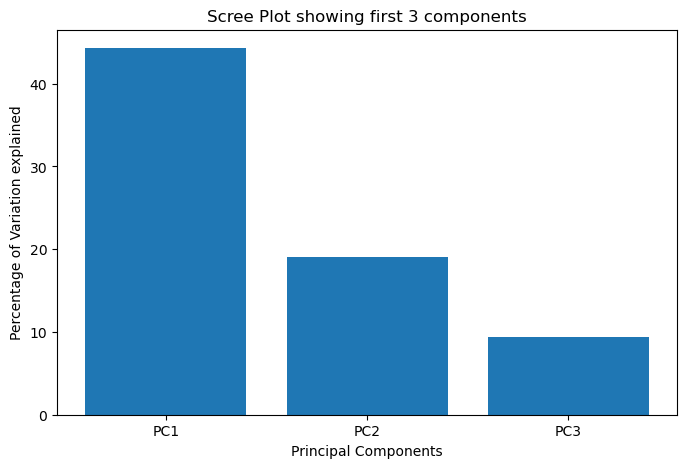

In [14]:
#performing the principal component analysis with 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(X_normalized)

#now based on the scree plot we see how many principal components are actually needed
percent_var = np.round(pca.explained_variance_ratio_*100, decimals=1)   #calculating the percentage of variation that each principal component accounts for
labels = ['PC'+str(p) for p in range(1,len(percent_var)+1)]

#plotting the graph to see contribution of each principal component
f, ax = plt.subplots(figsize=(8,5))
plt.bar(x=range(1,len(percent_var)+1), height=percent_var, tick_label=labels)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Scree Plot showing first 3 components')
plt.show()

In [15]:
explained_var = pca.explained_variance_ratio_
explained_var

array([0.44272026, 0.18971182, 0.09393163])

In [16]:
cum_var = np.cumsum(np.round(explained_var, decimals = 3))
cum_var_perc = cum_var*100

In [17]:
#creating a dataframe with the components
pc_df = pd.DataFrame(['PC1','PC2', 'PC3'], columns=['PC'])
explained_var_df = pd.DataFrame(explained_var, columns=['Explained variance'])
cum_var_df = pd.DataFrame(cum_var_perc, columns=['Cumulative variance (in %)'])
     

total_var_explained = pd.concat([pc_df, explained_var_df, cum_var_df], axis=1)
total_var_explained

,PC,Explained variance,Cumulative variance (in %)
0,PC1,0.442720,44.3
1,PC2,0.189712,63.3
2,PC3,0.093932,72.7


In [18]:
#transforming the data to the reduced dimension data
#this is the data that we are going to work with during the analysis

pca_data = pca.fit_transform(X_normalized)
print('The reduced data is of the dimension: ', pca_data.shape)

The reduced data is of the dimension:  (569, 3)


In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

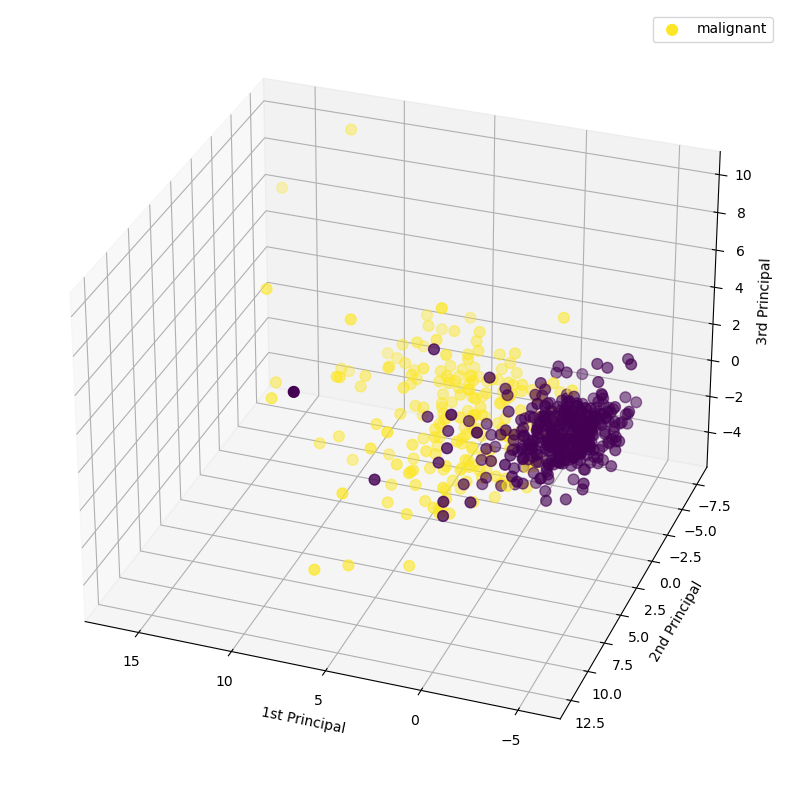

In [20]:
df_diag = y.apply(lambda x: 1 if x == 'M' else 0)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], c=df_diag,cmap=plt.cm.get_cmap('viridis', 2), s=60)
ax.legend(['malignant'])
ax.set_xlabel('1st Principal')
ax.set_ylabel('2nd Principal')
ax.set_zlabel('3rd Principal')
ax.view_init(30, 110)

We can see that
- The data seems to be clustered in two distinct regions, suggesting a good separation between the classes.
- The first two principal components (PC1 and PC2) capture most of the variance in the data, as the data points are spread out more along these axes compared to the third principal component (PC3).

After separating into 3 main components, we will visually check how the first two can separate the data

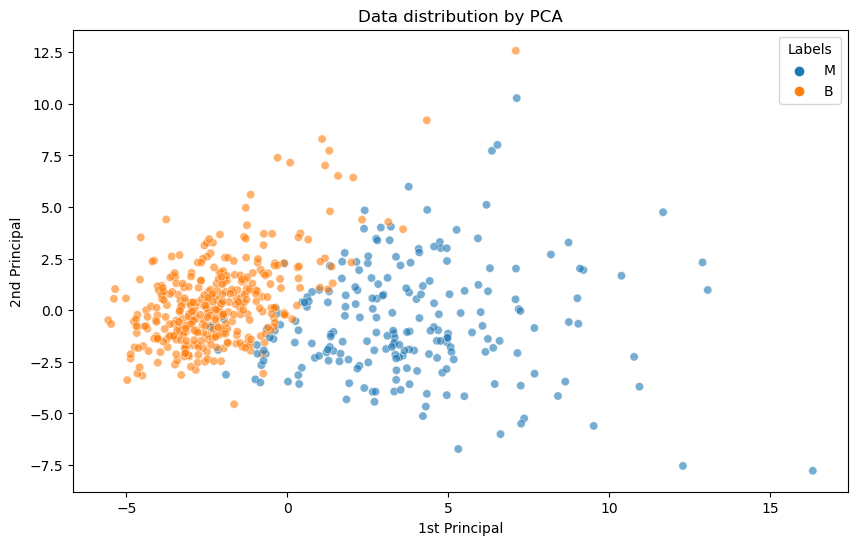

In [21]:
#appending labels to the 2D projected data
#using just 2 principal components for the ease of visualization

pca_1 = PCA(n_components=2)
pca_data_1 = pca_1.fit_transform(X_normalized)
pca_data_1 = np.vstack((pca_data_1.T, y)).T

#creating a new dataframe for plotting the labeled points
data_pca = pd.DataFrame(data=pca_data_1, columns=('1st Principal', '2nd Principal', 'Labels'))
data_pca.head()

#visualizing the 2D points
plt.figure(figsize = (10,6))
sns.scatterplot(x='1st Principal', y='2nd Principal', hue="Labels", legend="full",alpha=0.6, data=data_pca)
plt.title("Data distribution by PCA")
plt.show()

we opt to leverage PCA to distill the multidimensional nature of the data into a more digestible form. By reducing the data to two principal components, we aim to visualize it in a 2D plot, offering a clearer representation of the underlying patterns and relationships among the variables. Now,we will show the numbers of model with 2 components

In [22]:
data_pca.describe()

,1st Principal,2nd Principal,Labels
count,569.000000,569.000000,569
unique,569.000000,569.000000,2
top,9.192837,1.948583,B
freq,1.000000,1.000000,357


As the features are now reduced down to 2 components from 30 components, it reduces our understandability of the data of what each components represents.The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object. We can look at each pca components using the numpy which is represented as a vector.

In [23]:
pca_1.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

<Axes: >

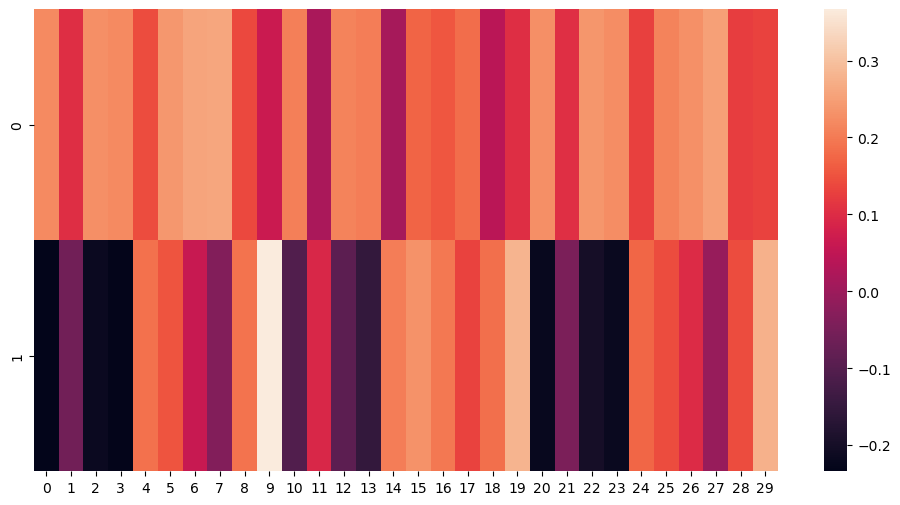

In [24]:
df_components = pd.DataFrame(pca_1.components_)
plt.figure(figsize=(12,6))
sns.heatmap(df_components,)

This heatmap and the color bar represents the correlation between the various feature and the principal components. The range of correlation values (-0.2 to 0.3) indicates relatively weak correlations between individual features and the principal components.This means that the principal components likely capture a more complex combination of the original variables. If many features exhibit weak correlations with the first few principal components, there is a good chance that PCA can effectively reduce dimensionality. 

## Accuracy scores

Having transformed the breast cancer dataset using PCA for both 2D and 3D representations, our focus shifts to evaluating the efficacy of our dimensionality reduction approach. Accuracy scores serve as a crucial metric for quantifying how well our models differentiate between benign and malignant tumors. By comparing the scores derived from full-dimensional data to those obtained from the 2D and 3D PCA-transformed data, we aim to address the following questions:

- **Impact of Dimensionality Reduction**: Did reducing the dimensionality lead to improved model performance, a potential decrease, or negligible change in accuracy?
- **Optimal Representation**: Does working with a 2D or 3D representation of the data yield better results, or is the difference minimal?

In [25]:
# full dataset
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=0)
LR = LogisticRegression(random_state=0)
LR.fit(x_train_1, y_train_1)

print('%s: %.3f' % ('Train Accuracy Logistic Regression of PCA model (n=30)', accuracy_score(y_train_1, LR.predict(x_train_1))))
print('%s: %.3f' % ('Test Accuracy Logistic Regression of PCA model (n=30)', accuracy_score(y_test_1, LR.predict(x_test_1))))
print(classification_report(y_test_1, LR.predict(x_test_1)))

Train Accuracy Logistic Regression of PCA model (n=30): 0.951
Test Accuracy Logistic Regression of PCA model (n=30): 0.944
              precision    recall  f1-score   support

           B       0.98      0.93      0.95        90
           M       0.89      0.96      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [26]:
pca = PCA(n_components=2).fit(X_normalized)
X_pca2 = pca.transform(X_normalized)
print(X.shape, X_pca2.shape)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pca2, y,random_state=0)
LR2 = LogisticRegression()
LR2.fit(X_train_2, y_train_2)
print('%s: %.3f' % ('Train Accuracy Logistic Regression of PCA model (n=2)', accuracy_score(y_train_2, LR2.predict(X_train_2))))
print('%s: %.3f' % ('Test Accuracy Logistic Regression of PCA model(n=2)', accuracy_score(y_test_2, LR2.predict(X_test_2))))
print(classification_report(y_test_2, LR2.predict(X_test_2)))


(569, 30) (569, 2)
Train Accuracy Logistic Regression of PCA model (n=2): 0.962
Test Accuracy Logistic Regression of PCA model(n=2): 0.951
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        90
           M       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [27]:
pca = PCA(n_components=3).fit(X_normalized)
X_pca3 = pca.transform(X_normalized)
print(X.shape, X_pca3.shape)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_pca3, y, random_state=0)
LR3 = LogisticRegression(random_state=0)
LR3.fit(X_train_3, y_train_3)
print('%s: %.3f' % ('Train Accuracy Logistic Regression of PCA model (n=3)', accuracy_score(y_train_3, LR3.predict(X_train_3))))
print('%s: %.3f' % ('Test Accuracy Logistic Regression of PCA model (n=3)', accuracy_score(y_test_3, LR3.predict(X_test_3))))
print(classification_report(y_test_3, LR3.predict(X_test_3)))


(569, 30) (569, 3)
Train Accuracy Logistic Regression of PCA model (n=3): 0.960
Test Accuracy Logistic Regression of PCA model (n=3): 0.930
              precision    recall  f1-score   support

           B       0.95      0.93      0.94        90
           M       0.89      0.92      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



**Comment:**
- PCA with 2 components provides the best balance between dimensionality reduction and model performance, as it achieves the highest test accuracy among the three scenarios.

- Despite reducing the number of features, PCA effectively retains relevant information, as evidenced by the consistently high precision, recall, and F1-score across all models.

> ### Hypothesis 1 is substantiated through the calculation of accuracy scores.

While PCA has shown promising results, especially in the 2D representation, it's worth exploring other dimensionality reduction techniques that could potentially offer additional advantages for visualization and analysis. In particular, let's consider the following non-linear methods:


At this stage, after obtaining the results from PCA, I observe that PCA may yield better outcomes than the other two methods, t-SNE and MDS:

> ### Hypothesis 2
> PCA achieves higher accuracy than t-SNE and MDS in breast cancer classification, as evidenced by higher Accuracy, F1-score, and AUC-ROC.

## t-SNE

In contrast to PCA's focus on linear relationships, t-SNE (t-Distributed Stochastic Neighbor Embedding) excels at capturing non-linear structures in data.

**Understanding t-SNE:**

- Local Structure Preservation: t-SNE emphasizes preserving local relationships between data points, enabling it to uncover intricate clusters and patterns.
- Probability Distributions: It transforms relationships into probabilities, enhancing sensitivity to local structures.
- Random Neighbor Embedding: t-SNE maps data points to a two- or three-dimensional space, emphasizing similarity between nearby points.

**Comparison with PCA:**

- While PCA captures global variance, t-SNE unveils complex non-linear structures, providing a more nuanced understanding of data patterns. By choosing *n_components=2*, we simplify interpretation and enable direct comparison with PCA.

**Implementation:**

- Despite its computational complexity, t-SNE offers valuable insights into non-linear relationships, justifying its use alongside PCA for a comprehensive analysis.

Employing t-SNE alongside PCA allows for a deeper exploration of data, revealing both global and local structures.


In [28]:
tsne = TSNE(n_components=2, perplexity=70,random_state = 0)
X_tsne = tsne.fit_transform(X_normalized)
print(X.shape, X_tsne.shape)



data_tsne = pd.DataFrame({'1st Principal' : X_tsne[:,0],
                       '2nd Principal' : X_tsne[:,1],
                        'Labels' : y
                       })
data_tsne['Labels'].value_counts()


(569, 30) (569, 2)


Labels
B    357
M    212
Name: count, dtype: int64

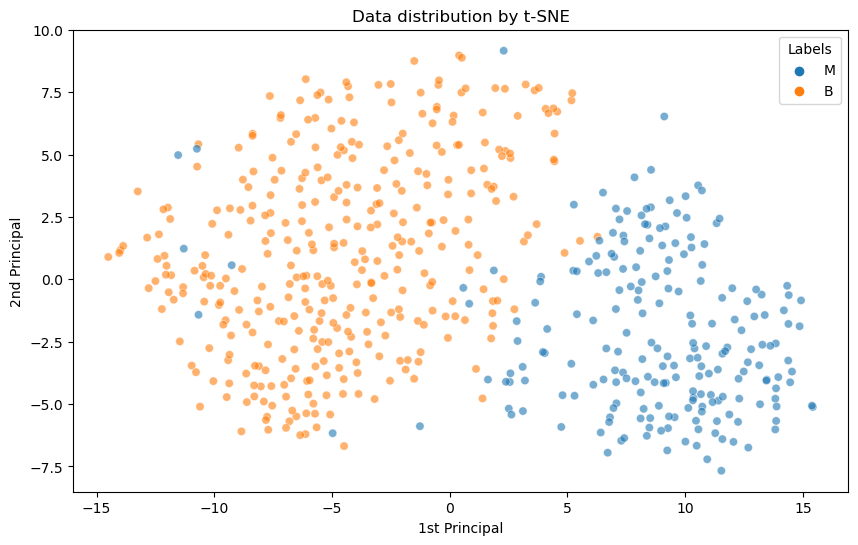

In [29]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "1st Principal", y = '2nd Principal', hue = 'Labels', legend = 'full',alpha=0.6, data = data_tsne)
plt.title("Data distribution by t-SNE")
plt.show()

## MDS

Multidimensional scaling (MDS) is a dimensionality reduction technique that excels at visualizing pairwise relationships between data points. Unlike PCA, which emphasizes preserving variance, MDS focuses on maintaining the distances or similarities between objects in a low-dimensional representation (Borg & Groenen, 2005). This makes MDS well-suited for exploratory analysis and identifying potential clusters or patterns based on the relative positioning of data points.

Since PCA has indicated that two components efficiently capture significant variance for our breast cancer dataset, I'm employing MDS with n_components=2 to facilitate a direct comparison between the two approaches.  This will help us understand their relative strengths in representing the dataset's key characteristics.

In [30]:
# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)
distance_matrix = pairwise_distances(X_normalized, metric='euclidean')

mds = MDS(n_components=2, dissimilarity='precomputed')
X_mds = mds.fit_transform(distance_matrix)
print(X.shape, X_mds.shape)

(569, 30) (569, 2)


Calculating distances plays a vital role in Multidimensional Scaling (MDS) for several reasons. 
- Firstly, it helps preserve the local structure of the data, ensuring that nearby points in the original space remain close in the embedded space. This local structure preservation is essential for effectively capturing the relationships between data points. 
- Additionally, utilizing distances facilitates comparability between different methods, such as PCA and t-SNE, enabling more efficient comparisons in terms of their ability to differentiate between data classes and patterns. 
- Moreover, by precomputing distance matrices, MDS computations can be significantly accelerated, especially for large datasets. This computational efficiency enhances the scalability of MDS, making it suitable for handling diverse datasets across various domains.


In [31]:
data_mds = pd.DataFrame({'1st Principal' : X_mds[:, 0],
                       '2nd Principal' : X_mds[:, 1],
                        'Labels' : y
                       })
data_mds['Labels'].value_counts()


Labels
B    357
M    212
Name: count, dtype: int64

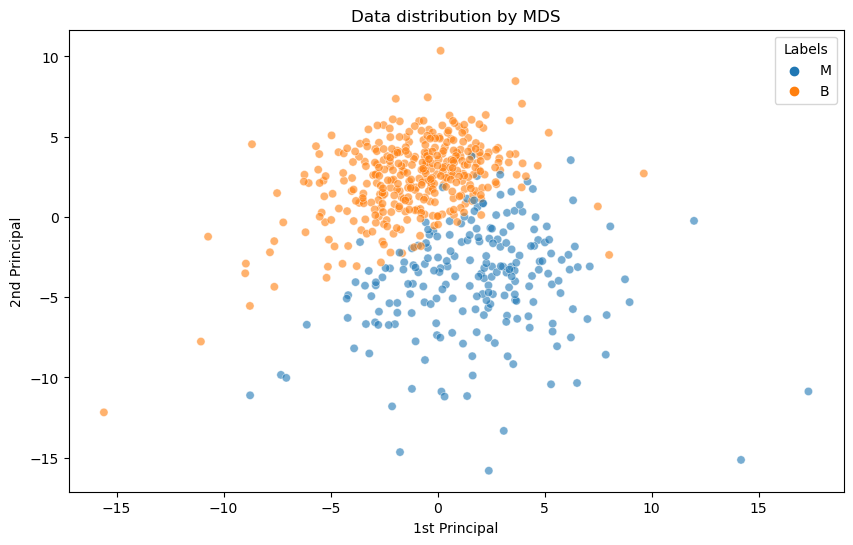

In [32]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "1st Principal", y = '2nd Principal', hue = 'Labels', legend = 'full', alpha=0.6, data = data_mds)
plt.title("Data distribution by MDS")
plt.show()

# Evaluation Criteria

- Use of accuracy scores derived from logistic regression models as the primary metric for evaluating the performance of dimensionality reduction methods.
- Comparison of accuracy scores across different dimensionality reduction techniques to identify the method that yields the highest predictive accuracy for breast cancer classification.

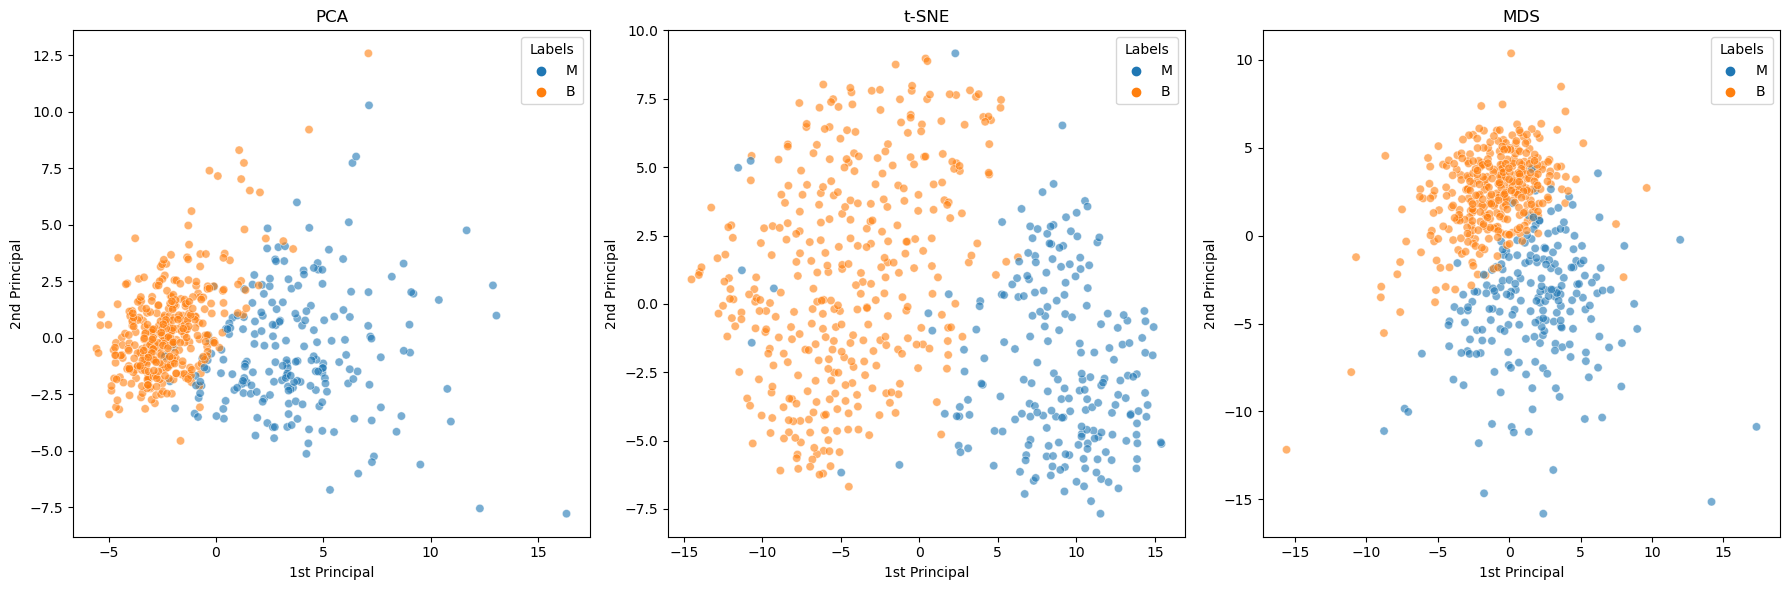

In [33]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting PCA
sns.scatterplot(ax=axes[0], x='1st Principal', y='2nd Principal', hue="Labels", legend="full",alpha=0.6, data=data_pca)
axes[0].set_title('PCA')

# Plotting t-SNE
sns.scatterplot(ax=axes[1], x='1st Principal', y='2nd Principal', hue='Labels', legend='full',alpha=0.6, data=data_tsne)
axes[1].set_title('t-SNE')

# Plotting MDS
sns.scatterplot(ax=axes[2], x='1st Principal', y='2nd Principal', hue='Labels', legend='full',alpha=0.6, data=data_mds)
axes[2].set_title('MDS')

# Show plots
plt.tight_layout()
plt.show()

In [34]:
print('%s: %.3f' % ('Train Accuracy Logistic Regression of PCA model (n=2)', accuracy_score(y_train_2, LR2.predict(X_train_2))))
print('%s: %.3f' % ('Test Accuracy Logistic Regression of PCA model(n=2)', accuracy_score(y_test_2, LR2.predict(X_test_2))))
print(classification_report(y_test_2, LR2.predict(X_test_2)))

Train Accuracy Logistic Regression of PCA model (n=2): 0.962
Test Accuracy Logistic Regression of PCA model(n=2): 0.951
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        90
           M       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [35]:
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, y, random_state=0)
LR_tsne = LogisticRegression()
LR_tsne.fit(X_train_tsne, y_train)

print('%s: %.3f' % ('Train Accuracy Logistic Regression of T-SNE model', accuracy_score(y_train, LR_tsne.predict(X_train_tsne))))
print('%s: %.3f' % ('Test Accuracy Logistic Regression of T-SNE model', accuracy_score(y_test, LR_tsne.predict(X_test_tsne))))
print(classification_report(y_test, LR2.predict(X_test_tsne)))

Train Accuracy Logistic Regression of T-SNE model: 0.972
Test Accuracy Logistic Regression of T-SNE model: 0.958
              precision    recall  f1-score   support

           B       0.96      0.87      0.91        90
           M       0.81      0.94      0.87        53

    accuracy                           0.90       143
   macro avg       0.88      0.91      0.89       143
weighted avg       0.90      0.90      0.90       143



In [36]:
X_train_mds, X_test_mds, y_train, y_test = train_test_split(X_mds, y, random_state=0)
clf_mds = LogisticRegression(random_state=0)
clf_mds.fit(X_train_mds, y_train)
print('%s: %.3f' % ('Train Accuracy Logistic Regression of MDS model', accuracy_score(y_train, clf_mds.predict(X_train_mds))))
print('%s: %.3f' % ('Test Accuracy Logistic Regression of MDS model', accuracy_score(y_test, clf_mds.predict(X_test_mds))))

print(classification_report(y_test, clf_mds.predict(X_test_mds)))

Train Accuracy Logistic Regression of MDS model: 0.965
Test Accuracy Logistic Regression of MDS model: 0.930
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        90
           M       0.91      0.91      0.91        53

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



**Accuracy score:**

- The model utilizing t-SNE achieves the highest accuracy on both the training and testing sets, with scores of 0.972 and 0.958, respectively. The PCA-based model achieves the second highest accuracy, with corresponding scores of 0.962 on the training set and 0.951 on the testing set. The MDS-based model exhibits the lowest accuracy, with scores of 0.944 on the training set and 0.930 on the testing set.

**Precision, Recall, and F1-score:**

- It is imperative to consider these metrics to gain a comprehensive understanding of each model's performance across different data classes. Across all classes, the t-SNE-based model tends to exhibit higher precision, recall, and F1-score compared to other models. While its performance is relatively good, it faces some difficulty with class B (benign), indicated by lower precision. This could be attributed to partial overlap between clusters generated by t-SNE.

- The PCA-based model demonstrates the highest precision and recall for class B (benign), but lower precision and recall for class M (malignant) compared to the t-SNE-based model. The PCA-based model effectively distinguishes both class B (benign) and M (malignant) with high precision, recall, and F1-scores.

- The MDS-based model exhibits the highest precision and recall for class M (malignant), but lower for class B (benign) compared to the PCA and t-SNE-based models. While it performs well in distinguishing class B, it faces challenges in distinguishing class M (malignant).

**Comparing Performance Quality:**

- t-SNE demonstrates an advantage in preserving local structure, resulting in overall better accuracy.

- Both PCA and t-SNE exhibit good efficiency, suggesting their potential utility in breast cancer data analysis.

- MDS appears to be more suitable for finding and clustering data points with similar distances. However, in this case, MDS struggles with clear differentiation between the two classes (malignant and benign).

In conclusion, while PCA, t-SNE, and MDS can all be employed for dimensionality reduction and visualization of sample relationships, the model utilizing t-SNE appears to be more effective in classifying breast cancer data based on evaluation metrics.

> ### Hypothesis H2, which predicted that PCA would achieve higher accuracy than t-SNE and MDS, is rejected.

# Discussions

## Conclusion

Based on the acceptance of H1, PCA effectively reduces breast cancer data to two dimensions while retaining important information for classification and diagnosis. However, H2 is rejected as PCA does not achieve higher accuracy than t-SNE and MDS in breast cancer classification. PCA remains an efficient method for dimensionality reduction in breast cancer data while preserving critical information. Nonetheless, it may not be the optimal method for breast cancer classification, as other methods like t-SNE could potentially achieve higher effectiveness.

- A comparative analysis of PCA, t-SNE, and MDS for dimensionality reduction showed that all techniques achieved high accuracy with a logistic regression classifier.
- t-SNE emerged as the slightly superior method, demonstrating the highest test accuracy (0.958) and effective preservation of local data structure. This suggests the presence of relevant non-linear patterns in the breast cancer dataset.
- PCA performed similarly well (test accuracy of 0.951), indicating strong linear separability of the original features.
- MDS, while also effective, exhibited slightly lower performance (test accuracy of 0.93), possibly due to limitations in capturing the distinction between the two classes based on the chosen distance metric.

## Limitations

- Throughout the execution of my project, several limitations related to both methodology and evaluation, as well as domain knowledge, have been identified.

- In terms of methodology, while I utilized t-SNE and MDS for dimensionality reduction, selecting the perplexity for t-SNE and solely using Euclidean distance in MDS posed challenges. Perplexity in t-SNE could impact the outcome of dimensionality reduction, and there are potentially more effective distance metrics for MDS.

- Regarding evaluation, relying solely on the accuracy score of logistic regression to compare identified models was a limitation. To ensure objectivity and comprehensiveness in evaluation, adopting more diverse model evaluation methods is essential.

- Lastly, in terms of domain knowledge, lacking deep understanding in the medical field posed limitations in interpreting results post-dimensionality reduction. Collaborating with healthcare experts or integrating medical knowledge could enhance understanding and yield more accurate conclusions from my project.

## Recommendations

- For this breast cancer dataset, either t-SNE or PCA would be suitable dimensionality reduction methods for enhancing the accuracy of diagnostic models.
- If the primary goal is to maximize accuracy and insights into non-linear relationships, t-SNE is the preferred choice.
- When emphasis is on clear class separation and computational efficiency, PCA offers a reliable and well-established option.
- Investigating alternative distance metrics or employing non-metric MDS could potentially improve the performance of MDS for this specific dataset.

# Further Considerations and Future Directions

**Generalization and Robustness Analysis:**
- Employ cross-validation techniques to evaluate the generalizability of these findings and alleviate potential overfitting.
- Experiment with various classifiers and hyperparameters to gain additional insights into the robustness of these techniques in the context of breast cancer diagnosis.

**Visualization and Interpretation:**
- Generate visualizations of the reduced data representations to gain a deeper understanding of class separation and potential clustering patterns.
- Research methods of dimensionality reduction focusing on interpretability, particularly in the medical field, enabling experts to comprehend how machine learning models make decisions.

**Advanced Dimensionality Reduction Techniques:**
- Explore methods capable of dynamically adjusting the number of components to optimize performance. This automation can streamline the process of selecting the appropriate dimensionality, enhancing the efficiency of current techniques.

**Integration with Domain Knowledge:**
- Incorporate medical domain knowledge into the dimensionality reduction process. Utilize constraints based on understanding disease mechanisms to guide algorithms in discovering more clinically meaningful low-dimensional representations.

# References

- Abdi, H., & Williams, L. J. (2010). Principal component analysis. *Wiley Interdisciplinary Reviews: Computational Statistics*, 2(4), 433-459.
- Bennett, K. P. (1992). Decision tree construction via linear programming. *Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society Conference*, 97-101..
- Bennett, K. P., & Mangasarian, O. L. (1992). Robust linear programming discrimination of two linearly inseparable sets. *Optimization Methods and Software*, 1(1), 23-34.
- Borg, I., & Groenen, P. J. F. (2005). Modern multidimensional scaling: Theory and applications. *Springer Science & Business Media*.
- Curtis, C., Shah, S. P., Chin, S. F., Turashvili, G., Rueda, O. M., Dunning, M. J., ... & Aparicio, S. A. J. R. (2012). The genomic and transcriptomic architecture of 2,000 breast tumours reveals novel subgroups. *Nature*, 486(7403), 346–352.
- Deerwester, S., Dumais, S. T., Furnas, G. W., Landauer, T. K., & Harshman, R. (1990). Indexing by latent semantic analysis. *Journal of the American Society for Information Science*, 41(6), 391-407.
- Harbeck, N., & Gnant, M. (2017). Breast cancer. *The Lancet*, 389(10074), 1134-1150.
- Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. *Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences*, 374(2065).
- Koboldt, D. C., Zhang, Q., Larson, D. E., Shen, D., McLellan, M. D., Lin, L., ... & Mardis, E. R. (2012). Comprehensive molecular portraits of human breast tumours. *Nature*, 490(7418), 61-70.
- Maaten, L. van der, Postma, E., & Herik, J. van den. (2009). Dimensionality reduction: A comparative review. *Journal of Machine Learning Research*, 10(1–41).
- Perou, C. M., Sørlie, T., Eisen, M. B., van de Rijn, M., Jeffrey, S. S., Rees, C. A., ... & Botstein, D. (2000). Molecular portraits of human breast tumours. *Nature*, 406(6797), 747.
- van der Maaten, L., & Hinton, G. (2008). Visualizing data using t-SNE. *Journal of Machine Learning Research*, 9(11), 2579-2605.
